In [4]:
from pymc3 import Model, Uniform, Normal


In [ ]:
# Aprendendo a mecher com bayes com pymc3

In [38]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Abrindo os dados

In [9]:
radon = pd.read_csv("radon.csv", index_col=0)
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


In [14]:
hennepin_radon = radon.query('county=="HENNEPIN"')
data = hennepin_radon["log_radon"]
data.head()

264    2.079442
265    1.223775
266    0.788457
267    0.530628
268    1.410987
Name: log_radon, dtype: float64

# construindo o modelo

In [16]:
# construindo o modelo

In [5]:
with Model() as random_model:
    m_u = Normal("m_u", mu=0,sd=10)
    sd = Uniform("sd", 0,10)

In [36]:
# Passanbdo dados para o modelo

In [15]:
with random_model:
    dist = Normal("dist", mu=m_u, sd=sd, observed=data )

# extraindo amostras do nosso modelo

In [18]:
from pymc3 import fit


In [19]:
with random_model:
    samples =  fit(random_seed=10000).sample(1000)

Average Loss = 135.45: 100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3912.20it/s]
Finished [100%]: Average Loss = 135.33


In [20]:
from pymc3 import plot_posterior

C:\Users\zn_jo\AppData\Local\Programs\Python\Python37\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DD2CE3F08>],
      dtype=object)

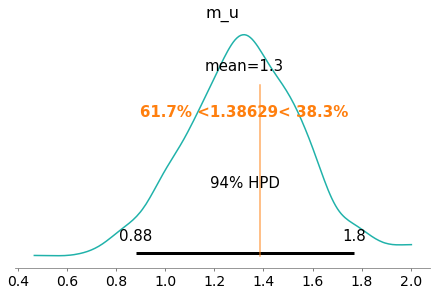

In [23]:
plot_posterior(samples, varnames=["m_u"], ref_val=np.log(4), color="LightSeaGreen")

o intervalo de credibilidade é de 0.88 até 1.8 nas médias

(array([0.007, 0.092, 0.205, 0.279, 0.205, 0.129, 0.04 , 0.027, 0.008,
        0.008]),
 array([1.59283786, 2.17481245, 2.75678703, 3.33876161, 3.92073619,
        4.50271077, 5.08468535, 5.66665993, 6.24863451, 6.83060909,
        7.41258367]),
 <a list of 10 Patch objects>)

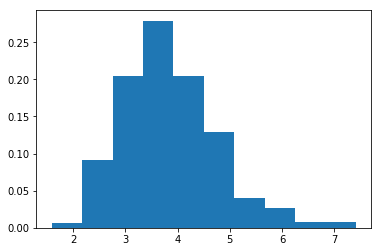

In [47]:
plt.hist( np.exp(samples["m_u"]), weights=np.full(1000 , 1/1000))

In [45]:
# len(samples["m_u"])
# np.full(1000 , 1/1000)

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 10

# Analisando o gráfico
O eixo do x é o eixo das médias calculadas
O euxo do y é o eixo das probabilidades



# Fazendo predições a partir dos dados gerados


In [25]:
print(samples)

<MultiTrace: 1 chains, 1000 iterations, 3 variables>


In [24]:
# podemos estrair o posteiror

mus = samples["m_u"]
print(mus)
sigmas = samples["sd"]

[1.01436866 1.28940072 0.849104   1.42072297 1.29430104 1.54442341
 1.58258146 1.21230708 1.30256228 1.10267311 1.19062191 1.11830768
 1.39217866 1.38150719 1.47508885 1.27694134 1.40622854 1.20632985
 1.35987575 1.37843325 1.22584352 1.09878883 1.81671536 1.02246629
 1.42453493 1.48396826 1.06240832 1.00489708 1.37489421 1.17255872
 1.10283799 0.65584993 1.27813481 1.35103345 1.60177363 1.0484445
 1.0480026  1.16622245 1.17766694 0.78592138 1.32359355 0.72011929
 1.28399115 1.52584246 1.3283718  0.97859275 1.6324297  1.02625061
 1.19333785 1.3669515  1.11070164 1.26030277 1.11091528 1.1687152
 1.40265065 1.34873882 1.03374925 1.31707374 1.56417423 1.23341294
 1.29503735 1.45491291 1.19122336 1.52687421 1.18316782 1.33534452
 1.61894344 1.45461414 1.47742815 1.39644393 1.12653368 1.31342466
 1.73277215 1.25045358 1.40595208 1.64712403 1.4528627  1.44458209
 1.34032146 1.43500111 1.01165706 1.50436819 1.32164179 1.26922102
 1.59179292 1.1836709  1.13154961 1.51359358 1.07532707 1.343482

In [48]:
# Draw, sacando valores do posterior de mus e sigmas
radon_samples = Normal.dist(mus,sigmas).random()

In [30]:
# Realizando uma operação vetoriale aplicando o resultado a uma media
(radon_samples > np.log(4)).mean()

0.47

In [ ]:
#posterior predictive distribution

# Conferindo o nosso posterior
Tiramos uma amostra de valores da nossa distribuição e estamo comporando como ela se parece

In [ ]:
Mudando os prior

In [31]:
import seaborn as sns

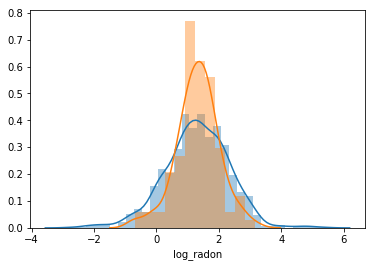

In [33]:
sns.distplot(radon_samples, label="simulated")
sns.distplot(data, label="observed")